In [1]:
import pandas as pd
import numpy as np

In [2]:
board_game_set = pd.read_csv('data/secondBoardGameDataSet.csv')
board_game_set.head(5)

# Saving dataset copy for later analysis
board_game_dataset_copy = board_game_set

### Dropping not useful data columns for the purpose of training

In [3]:
board_game_set = board_game_set.drop(['@objectid', 'name', 'description', 'image', 'yearpublished'], axis=1)
board_game_set

,boardgamecategory,minplayers,maxplayers,age,minplaytime,maxplaytime
0,"['Economic', 'Negotiation', 'Political']",3.0,5.0,14.0,240.0,240.0
1,"['Card Game', 'Fantasy']",3.0,4.0,12.0,30.0,30.0
2,"['Abstract Strategy', 'Medieval']",2.0,4.0,10.0,30.0,60.0
3,['Ancient'],2.0,4.0,12.0,60.0,60.0
4,"['Economic', 'Territory Building']",2.0,6.0,12.0,90.0,90.0
...,...,...,...,...,...,...
214980,NaN,NaN,NaN,NaN,NaN,NaN
214981,NaN,NaN,NaN,NaN,NaN,NaN
214982,NaN,NaN,NaN,NaN,NaN,NaN
214983,NaN,NaN,NaN,NaN,NaN,NaN


### Splitting categories and One Hot Encoding them for training

In [4]:
all_categories = board_game_set['boardgamecategory']
all_categories_list = [categories.strip("['']").split(', ') if isinstance(categories, str) else [] for categories in all_categories]
all_categories_list[0]

["Economic'", "'Negotiation'", "'Political"]

In [5]:
singular_game_categories = []

for index, categories in enumerate(all_categories_list):
    clean_categories = []
    for category in categories:
        category = category.strip('"')
        category = category.strip("'")
        category = category.replace("'", '')
        category = category.replace('"', '')
        clean_categories.append(category)
        if category not in singular_game_categories:
            singular_game_categories.append(category)
    all_categories_list[index] = clean_categories

singular_game_categories

['Economic',
 'Negotiation',
 'Political',
 'Card Game',
 'Fantasy',
 'Abstract Strategy',
 'Medieval',
 'Ancient',
 'Territory Building',
 'Civilization',
 'Nautical',
 'Childrens Game',
 'City Building',
 'Exploration',
 'Travel',
 'Farming',
 'Mythology',
 'Bluffing',
 'Science Fiction',
 'Collectible Components',
 'Dice',
 'Fighting',
 'Print & Play',
 'Maze',
 'Miniatures',
 'Racing',
 'American West',
 'Wargame',
 'Adventure',
 'Space Exploration',
 'Renaissance',
 'Modern Warfare',
 'Humor',
 'Electronic',
 'Horror',
 'Novel-based',
 'Deduction',
 'Word Game',
 'Aviation / Flight',
 'Movies / TV / Radio theme',
 'Party Game',
 'Memory',
 'Math',
 'Puzzle',
 'Real-time',
 'Trivia',
 'Industry / Manufacturing',
 'World War II',
 'Expansion for Base-game',
 'American Civil War',
 'Age of Reason',
 'American Indian Wars',
 'World War I',
 'Trains',
 'Animals',
 'Pirates',
 'Murder/Mystery',
 'Transportation',
 'Prehistoric',
 'Sports',
 'Action / Dexterity',
 'Game System',
 'Number

In [6]:
board_game_set['boardgamecategory'] = all_categories_list

In [7]:
board_game_set['boardgamecategory']

0                  [Economic, Negotiation, Political]
1                                [Card Game, Fantasy]
2                       [Abstract Strategy, Medieval]
3                                           [Ancient]
4                      [Economic, Territory Building]
                             ...                     
214980                                             []
214981                                             []
214982                                             []
214983                                             []
214984    [Card Game, Expansion for Base-game, Mafia]
Name: boardgamecategory, Length: 214985, dtype: object

In [8]:
for singular_game_category in singular_game_categories:
    board_game_set[singular_game_category] = 0

board_game_set

,boardgamecategory,minplayers,maxplayers,age,minplaytime,maxplaytime,Economic,Negotiation,Political,Card Game,...,Book,Music,Environmental,Pike and Shot,Religious,Video Game Theme,Mature / Adult,Vietnam War,Fan Expansion,Korean War
0,"[Economic, Negotiation, Political]",3.0,5.0,14.0,240.0,240.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Card Game, Fantasy]",3.0,4.0,12.0,30.0,30.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Abstract Strategy, Medieval]",2.0,4.0,10.0,30.0,60.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,[Ancient],2.0,4.0,12.0,60.0,60.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Economic, Territory Building]",2.0,6.0,12.0,90.0,90.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214980,[],NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214981,[],NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214982,[],NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214983,[],NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
for index, categories in enumerate(board_game_set['boardgamecategory']):
    for category in categories:
        board_game_set.loc[index, category] = 1

board_game_set = board_game_set.drop(['boardgamecategory'], axis=1)

### Removing null values that might potentially hinder training

In [10]:
pd.set_option('display.max_columns', None)
board_game_set = board_game_set.dropna()
board_game_set

,minplayers,maxplayers,age,minplaytime,maxplaytime,Economic,Negotiation,Political,Card Game,Fantasy,Abstract Strategy,Medieval,Ancient,Territory Building,Civilization,Nautical,Childrens Game,City Building,Exploration,Travel,Farming,Mythology,Bluffing,Science Fiction,Collectible Components,Dice,Fighting,Print & Play,Maze,Miniatures,Racing,American West,Wargame,Adventure,Space Exploration,Renaissance,Modern Warfare,Humor,Electronic,Horror,Novel-based,Deduction,Word Game,Aviation / Flight,Movies / TV / Radio theme,Party Game,Memory,Math,Puzzle,Real-time,Trivia,Industry / Manufacturing,World War II,Expansion for Base-game,American Civil War,Age of Reason,American Indian Wars,World War I,Trains,Animals,Pirates,Murder/Mystery,Transportation,Prehistoric,Sports,Action / Dexterity,Game System,Number,Spies/Secret Agents,Medical,Mafia,Zombies,Comic Book / Strip,Arabian,Napoleonic,Civil War,Educational,Post-Napoleonic,American Revolutionary War,Book,Music,Environmental,Pike and Shot,Religious,Video Game Theme,Mature / Adult,Vietnam War,Fan Expansion,Korean War
0,3.0,5.0,14.0,240.0,240.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,4.0,12.0,30.0,30.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,10.0,30.0,60.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,4.0,12.0,60.0,60.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,6.0,12.0,90.0,90.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214972,2.0,6.0,10.0,60.0,60.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
214973,4.0,20.0,17.0,20.0,30.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
214974,2.0,6.0,14.0,15.0,30.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
214975,2.0,4.0,18.0,20.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
def scale_data(dataset: pd.DataFrame, columns: list):
    for column in columns:
        max_value = max(dataset[column])
        dataset[column] = dataset[column] / max_value

### Normalizing data

In [12]:
columns_to_scale = ['minplayers', 'maxplayers', 'age', 'minplaytime', 'maxplaytime']

scale_factors = dict.fromkeys(columns_to_scale)

for column in columns_to_scale:
    scale_factors[column] = max(board_game_set[column])

print(scale_factors)

scale_data(board_game_set, columns_to_scale)

{'minplayers': 50.0, 'maxplayers': 11299.0, 'age': 90.0, 'minplaytime': 157680.0, 'maxplaytime': 1576800.0}


In [13]:
board_game_set.head(5)

,minplayers,maxplayers,age,minplaytime,maxplaytime,Economic,Negotiation,Political,Card Game,Fantasy,Abstract Strategy,Medieval,Ancient,Territory Building,Civilization,Nautical,Childrens Game,City Building,Exploration,Travel,Farming,Mythology,Bluffing,Science Fiction,Collectible Components,Dice,Fighting,Print & Play,Maze,Miniatures,Racing,American West,Wargame,Adventure,Space Exploration,Renaissance,Modern Warfare,Humor,Electronic,Horror,Novel-based,Deduction,Word Game,Aviation / Flight,Movies / TV / Radio theme,Party Game,Memory,Math,Puzzle,Real-time,Trivia,Industry / Manufacturing,World War II,Expansion for Base-game,American Civil War,Age of Reason,American Indian Wars,World War I,Trains,Animals,Pirates,Murder/Mystery,Transportation,Prehistoric,Sports,Action / Dexterity,Game System,Number,Spies/Secret Agents,Medical,Mafia,Zombies,Comic Book / Strip,Arabian,Napoleonic,Civil War,Educational,Post-Napoleonic,American Revolutionary War,Book,Music,Environmental,Pike and Shot,Religious,Video Game Theme,Mature / Adult,Vietnam War,Fan Expansion,Korean War
0,0.06,0.000443,0.155556,0.001522,0.000152,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.06,0.000354,0.133333,0.000190,0.000019,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.04,0.000354,0.111111,0.000190,0.000038,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.04,0.000354,0.133333,0.000381,0.000038,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.04,0.000531,0.133333,0.000571,0.000057,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Training model

In [15]:
model = KMeans(n_clusters=5, verbose=1, random_state=1)
board_game_set['clusters'] = model.fit_predict(board_game_set)

Initialization complete
Iteration 0, inertia 296742.186219002.
Iteration 1, inertia 196418.1546427554.
Iteration 2, inertia 189752.3500064359.
Iteration 3, inertia 189359.49305571654.
Iteration 4, inertia 184227.1982806723.
Iteration 5, inertia 181055.26574083383.
Iteration 6, inertia 178724.46607381222.
Iteration 7, inertia 177682.404402851.
Iteration 8, inertia 177637.18641676338.
Iteration 9, inertia 177619.52664486686.
Iteration 10, inertia 177618.89960493962.
Iteration 11, inertia 177618.86282187322.
Converged at iteration 11: center shift 8.71399809392111e-08 within tolerance 2.674303571246811e-06.


### Data scatter analysis

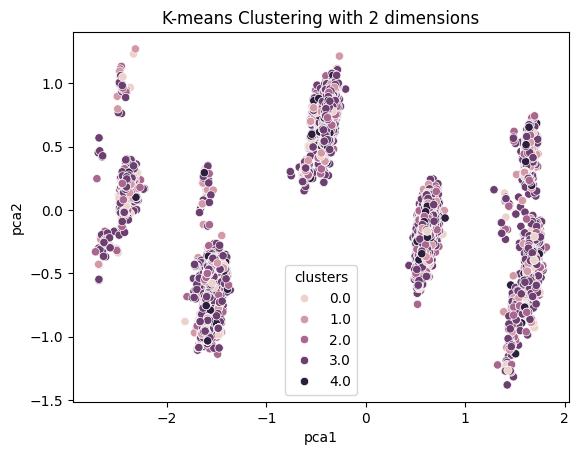

In [16]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(board_game_set)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=board_game_set['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [17]:
board_game_dataset_copy = board_game_dataset_copy.dropna()
board_game_dataset_copy['clusters'] = board_game_set['clusters']
board_game_dataset_copy = board_game_dataset_copy.drop(['@objectid', 'image', 'description'], axis=1)

In [21]:
board_game_dataset_copy[board_game_dataset_copy['clusters'] == 1].describe

<bound method NDFrame.describe of                         name  yearpublished  \
20      Gateway to the Stars         1994.0   
22              Divine Right         1979.0   
23         Twilight Imperium         1997.0   
24                Battlemist         1998.0   
33       Federation & Empire         1986.0   
...                      ...            ...   
214954      Bushido: Yanjing         2017.0   
214955    Bushido: Ying-Jian         2017.0   
214956    Bushido: Shenzhiqi         2017.0   
214957    Bushido: Shuohuang         2017.0   
214959       Bushido: Baichi         2017.0   

                                        boardgamecategory  minplayers  \
20      ['Civilization', 'Exploration', 'Science Ficti...         1.0   
22                    ['Fantasy', 'Political', 'Wargame']         2.0   
23      ['Civilization', 'Negotiation', 'Political', '...         2.0   
24                  ['Exploration', 'Fantasy', 'Wargame']         2.0   
33                         ['Science

### Predicting on example

In [19]:
to_predict = pd.DataFrame(columns=board_game_set.columns)

for column in board_game_set.columns:
    if column == 'Wargame':
        to_predict.loc[0, column] = 1
        continue    
    to_predict.loc[0, column] = 0

to_predict = to_predict.drop(['clusters'], axis=1)

model.predict(to_predict)

array([1])